In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc

from tqdm.notebook import tqdm

# Villain

$$\tilde V(n_p) = n_p^2 $$

Calculate average $\mathcal{E}(K) = \frac{1}{L^4} \sum_p \frac{1}{K} \tilde V(n_p)$

In [2]:
L = 16

inv_ks = list(np.linspace(0.1,1.0,30))
inv_ks = inv_ks + list(np.linspace(0.6,0.7,10))
inv_ks = np.array(list(sorted(set(inv_ks))))
ws = list(range(5))

all_windings = []
all_energies = []
for inv_k in tqdm(inv_ks,desc='K'):
    k_winding_nums = []
    k_energies = []
    for w in ws:
        state = np.zeros((L,L,L,L,6), dtype=np.int32)
        state[0,:,:,0,3] = w
        vns = [(n**2)*inv_k for n in range(100)]
        graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns,initial_state=state)

        graph.run_local_update(1000)

        winding_nums, energies = graph.simulate_and_get_winding_nums_and_energies(100, steps_per_sample=10, run_global_updates=False)
        k_winding_nums.append(winding_nums)
        k_energies.append(energies)
    all_windings.append(k_winding_nums)
    all_energies.append(k_energies)
all_windings = np.array(all_windings)
all_energies = np.array(all_energies)

K:   0%|          | 0/40 [00:00<?, ?it/s]

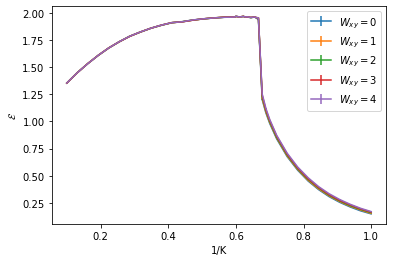

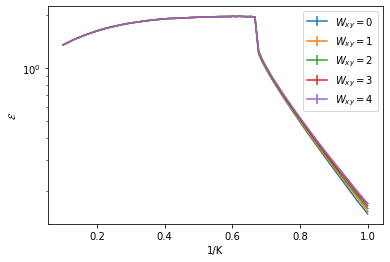

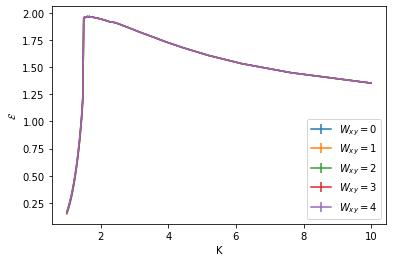

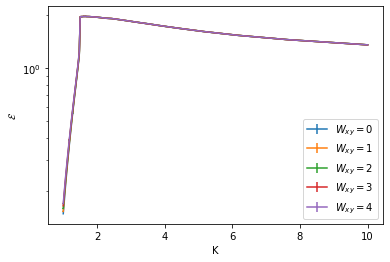

In [3]:
for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()


for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()

In [4]:
Ls = np.arange(4,22,2)
inv_ks = list(np.linspace(0.1,1.0,30))
inv_ks = inv_ks + list(np.linspace(0.6,0.7,10))
inv_ks = np.array(list(sorted(set(inv_ks))))
ws = list(range(5))

all_windings = []
all_energies = []
for inv_k in tqdm(inv_ks,desc='K'):
    k_winding_nums = []
    k_energies = []
    for L in Ls:
        vns = [(n**2)*inv_k for n in range(100)]
        graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns)

        graph.run_local_update(1000)

        winding_nums, energies = graph.simulate_and_get_winding_nums_and_energies(100, steps_per_sample=10, run_global_updates=False)
        k_winding_nums.append(winding_nums)
        k_energies.append(energies / (L**4))
    all_windings.append(k_winding_nums)
    all_energies.append(k_energies)
all_windings = np.array(all_windings)
all_energies = np.array(all_energies)

K:   0%|          | 0/40 [00:00<?, ?it/s]

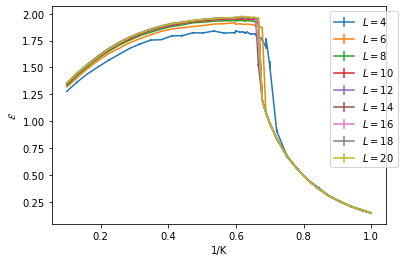

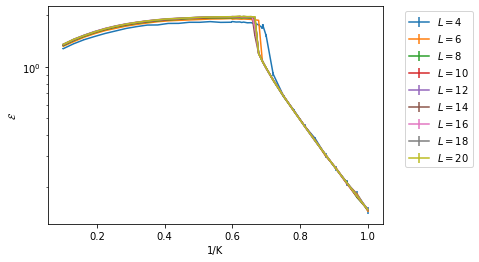

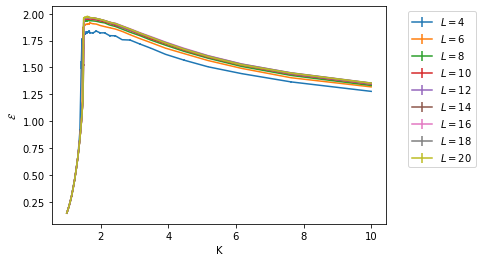

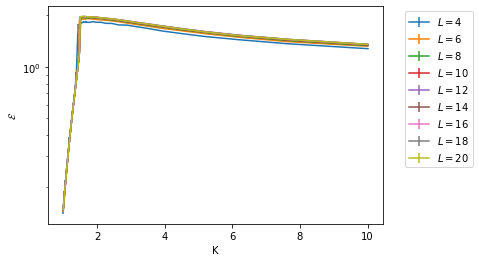

In [5]:
for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$L={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$L={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$L={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()


for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$L={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()

## Measuring $K_r$
<!-- There are some issues below -->
<!-- Dual picture:

$$Z = \sum_{\{n_p\}} \left( \prod_e \delta\left[d_{pe} n_p\right]\right)e^{\tilde V_{n_p}} e^{i n_p f_p}$$

$S_eff = - \mbox{ln} Z$

$$\partial_f S_{eff} \vert_{f=0} = - \frac{\partial_f^2 Z}{Z^2} + \left(\frac{\partial_f Z}{Z}\right)^2$$

$$\partial_f^2 S_{eff} = \frac{1}{(L_1 L_2)^2} \langle \left( \sum n_p \right)^2 \rangle^c$$

Villain Phase picture:

$$\partial_f^2 S_{eff} \vert_{f=0} = - K^2 \langle (\sum d_{pe} a_e)^2\rangle^c / L^4$$ -->

In [67]:
inv_kc = inv_ks[np.argmax(all_energies[:,-1,:].mean(axis=-1))]
inv_kc

0.6222222222222222

In [68]:
def make_graph(l=8, inv_k=1/2.0,vlen=100,device='gpu'):
    if device == 'gpu':
        graph = py_gauge_mc.GPUGaugeTheory(l,l,l,l,[(n**2)*inv_k for n in range(vlen)])
    elif device == 'cpu':
        graph = py_gauge_mc.GaugeTheory(l,l,l,l,[(n**2)*inv_k for n in range(vlen)])
    return graph

def run_experiment(l,inv_k=1/2.0,vlen=100,samples=100,local_updates_per_step=1,steps_per_sample=1000):
    g = make_graph(l=l, inv_k=inv_k, vlen=vlen)
    g.run_local_update(samples * steps_per_sample * local_updates_per_step)
    winding_nums = g.simulate_and_get_winding_nums(samples,local_updates_per_step=local_updates_per_step,
                                                   steps_per_sample=steps_per_sample)
    return winding_nums

In [69]:
L = 8
critical_winding_nums = run_experiment(L,inv_k=inv_kc,vlen=100, samples=1000, steps_per_sample=1000)
critical_winding_nums.var(axis=0).mean()

0.7704001666666662

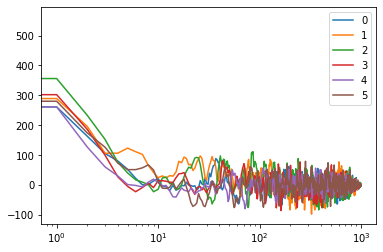

In [76]:
for i in range(winding_nums.shape[-1]):
    autocorr = np.correlate(critical_winding_nums[:,i], critical_winding_nums[:,i], mode='full')[len(total_w):]
    plt.plot(autocorr,label=f'{i}')
plt.xscale('log')
plt.legend()
plt.show()

In [71]:
L = 8
winding_nums = run_experiment(L, inv_k=0.6, vlen=100, samples=1000, steps_per_sample=1000)
winding_nums.var(axis=0).mean()

0.8129398333333353

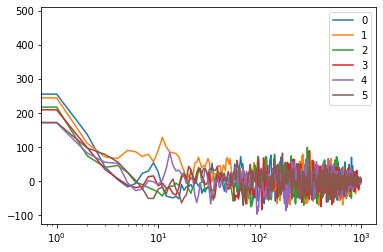

In [77]:
for i in range(winding_nums.shape[-1]):
    autocorr = np.correlate(winding_nums[:,i], winding_nums[:,i], mode='full')[len(total_w):]
    plt.plot(autocorr,label=f'{i}')
plt.xscale('log')
plt.legend()
plt.show()